In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

# Load the dataset (adjust the path if necessary)
df = pd.read_csv('/content/Cardano_cleaned.csv')

# If a 'Date' column exists, convert it to datetime and sort the data
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date')

# Choose the target column. If "Close" exists, we use it; otherwise, use the first column.
if 'Close' in df.columns:
    data = df['Close'].values.reshape(-1, 1)
else:
    data = df.iloc[:, 0].values.reshape(-1, 1)

# Scale the data to [0,1]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Define the number of past time steps to use for forecasting
n_steps = 10  # adjust as needed

# Create sequences from the data
X, y = [], []
for i in range(n_steps, len(scaled_data)):
    X.append(scaled_data[i - n_steps:i, 0])
    y.append(scaled_data[i, 0])
X, y = np.array(X), np.array(y)

# Split data into training and testing sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape input data to be 3D (samples, timesteps, features) for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(n_steps, 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Make predictions on the test set
y_pred = model.predict(X_test)

# Invert scaling for both predictions and actual test values
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred)

# 1. Calculate Additional Error Metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_inv, y_pred_inv)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

# Calculate the R2 score for the LSTM model predictions
model_r2 = r2_score(y_test_inv, y_pred_inv)
print("LSTM Model R2 score: ", model_r2)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.0263 - val_loss: 0.0313
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0039 - val_loss: 0.0175
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0018 - val_loss: 0.0211
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0015 - val_loss: 0.0125
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0013 - val_loss: 0.0123
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0013 - val_loss: 0.0119
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0013 - val_loss: 0.0115
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0013 - val_loss: 0.0111
Epoch 9/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0012 - val_loss: 0.0108
Epoch 10/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0012 - val_loss: 0.0104
Epoch 11/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0012 - val_loss: 0.0100
Epoch 12/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0012 - val_l

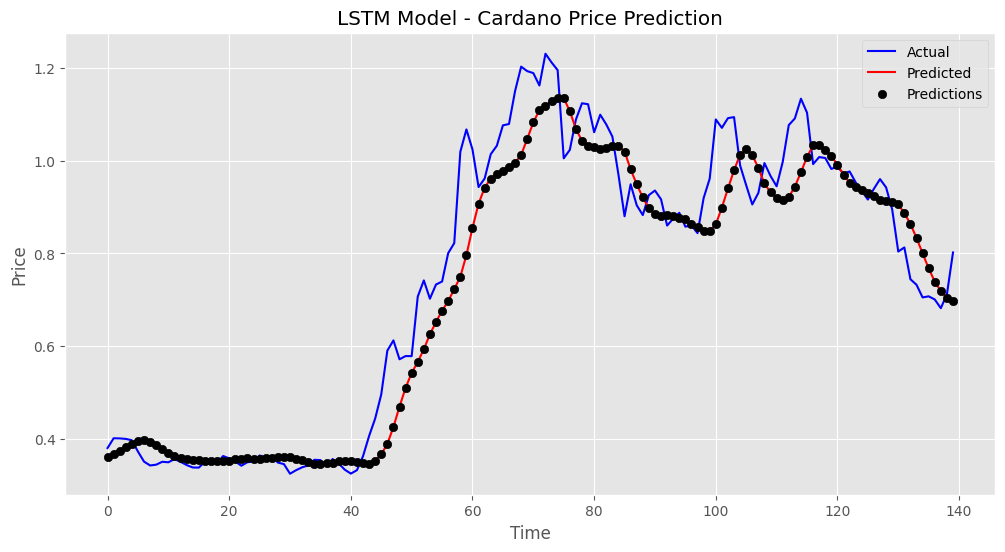

In [131]:
# Plot the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Actual', color='blue')
plt.plot(y_pred_inv, label='Predicted', linestyle='-', color='red')

# Add prediction points as scatter plot
plt.scatter(range(len(y_pred_inv)), y_pred_inv, color='black', label='Predictions', zorder=5)

plt.title('LSTM Model - Cardano Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [137]:
# 4. Save the Model for Future Use
model.save('lstm_model_Cardano.h5')
print("Model saved as 'lstm_model_Cardano.h5'")

Model saved as 'lstm_model_Cardano.h5'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━

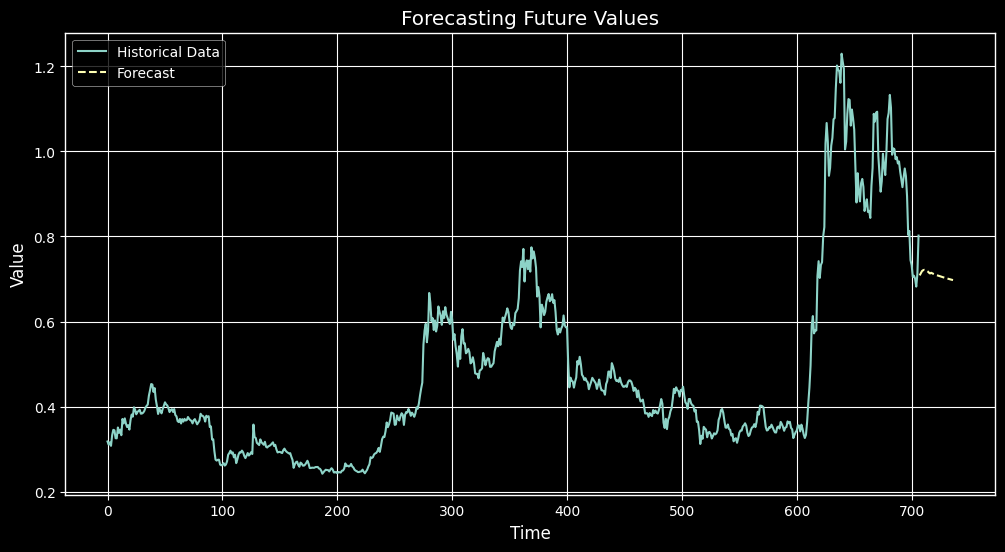

In [144]:
# Forecast future values (e.g., next 30 steps)
forecast_period = 30

# Get the last n_steps values from the scaled data to start forecasting
last_sequence = scaled_data[-n_steps:]  # shape: (n_steps, 1)
forecast = []

# Use a loop to predict the next value and update the sequence accordingly
current_sequence = last_sequence.copy()
for _ in range(forecast_period):
    # Reshape current sequence to match model input shape (1, n_steps, 1)
    current_sequence_reshaped = current_sequence.reshape((1, n_steps, 1))
    next_value = model.predict(current_sequence_reshaped)
    forecast.append(next_value[0, 0])

    # Append the predicted value and remove the first element to keep the window size constant
    current_sequence = np.append(current_sequence, next_value, axis=0)[1:]

# Convert forecast list to a numpy array and invert the scaling
forecast = np.array(forecast).reshape(-1, 1)
forecast_inv = scaler.inverse_transform(forecast)

# Create a time index for the forecast.
# If your DataFrame contains a 'Date' column, generate future dates; otherwise, use numeric indices.
if 'Date' in df.columns:
    last_date = df['Date'].iloc[-1]
    future_dates = pd.date_range(start=last_date, periods=forecast_period + 1, closed='right')
else:
    future_dates = np.arange(len(data), len(data) + forecast_period)

# Prepare a DataFrame for the forecast data
forecast_df = pd.DataFrame({'Forecast': forecast_inv.flatten()}, index=future_dates)

# Plot historical data and forecast
plt.figure(figsize=(12, 6))
if 'Date' in df.columns:
    plt.plot(df['Date'], data, label='Historical Data')
    plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', linestyle='--')
else:
    plt.plot(data, label='Historical Data')
    plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', linestyle='--')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Forecasting Future Values')
plt.legend()
plt.show()
